In [1]:
import numpy as np
import math
import array as arr
import matplotlib.pyplot as plt
import statistics

In [2]:
data=np.genfromtxt('TF.dat.txt', skip_header=1, dtype=float)

# Part A:

In [3]:
#Correct the observed circular speed
Vc_obs=data[:,5]
inc= data[:,4]
#Dividing the observed velocity over the sin(i)
ip=np.sin(np.radians(inc))
#take corrected out
Vc_correct=(Vc_obs/ip)
#convert the correct velocity to log in km/s
log=np.log10(Vc_correct)

for i in range (1,33):
    ngc = data[:,0] #galaxies in cluster
    print ('The correct velocity for galaxy', ngc[i], 'is', log[i], 'km/s')

The correct velocity for galaxy 4189.0 is 2.241971518040204 km/s
The correct velocity for galaxy 4192.0 is 2.3767228241069827 km/s
The correct velocity for galaxy 4206.0 is 2.161368002234975 km/s
The correct velocity for galaxy 4212.0 is 2.307447839434782 km/s
The correct velocity for galaxy 4216.0 is 2.428944290035574 km/s
The correct velocity for galaxy 4254.0 is 2.44153356926424 km/s
The correct velocity for galaxy 4321.0 is 2.509184391973635 km/s
The correct velocity for galaxy 4380.0 is 2.2385933740926123 km/s
The correct velocity for galaxy 4388.0 is 2.2762505622334634 km/s
The correct velocity for galaxy 4450.0 is 2.338441556399096 km/s
The correct velocity for galaxy 4451.0 is 2.181379412826875 km/s
The correct velocity for galaxy 4498.0 is 2.050119115930989 km/s
The correct velocity for galaxy 4501.0 is 2.4903480106968767 km/s
The correct velocity for galaxy 4519.0 is 2.1516649572770135 km/s
The correct velocity for galaxy 4522.0 is 2.0961895122315464 km/s
The correct velocity

In [4]:
B=data[:,1] # apparent magnitude B
R=data[:,2] # apparent magnitude R
I=data[:,3] # apparent magnitude I

C:\Users\katel\AppData\Local\Temp\ipykernel_7580\1540121979.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


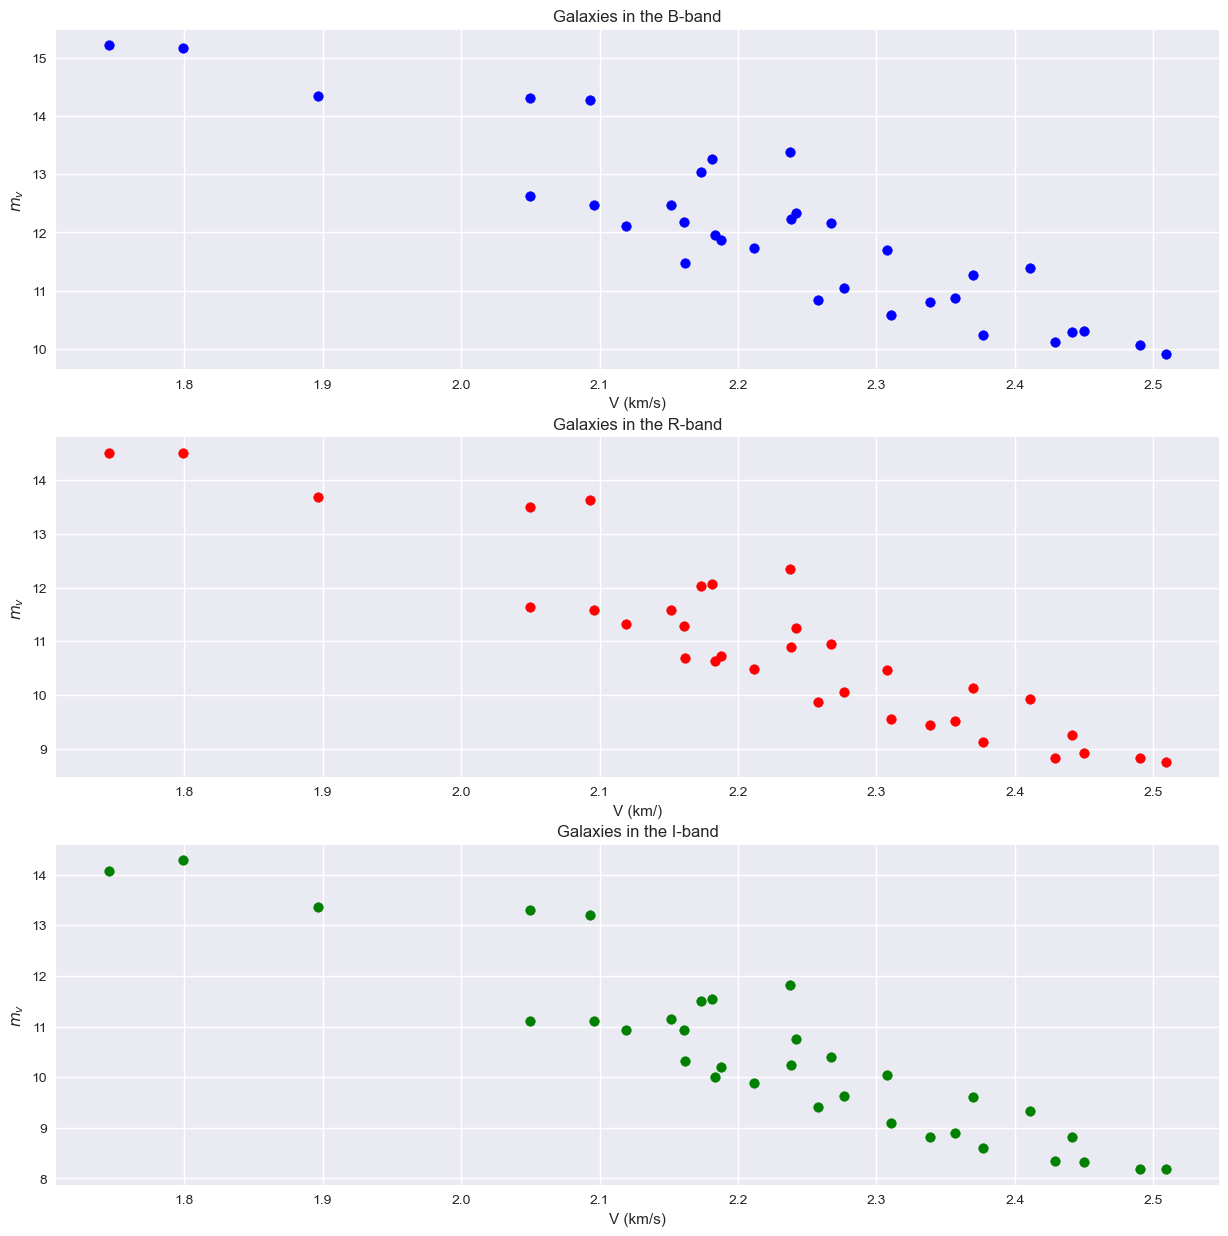

In [5]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(311)
plt.scatter(log, B, color='b', marker="o", label='original')
plt.xlabel('V (km/s)')
plt.ylabel('$m_v$')
plt.title('Galaxies in the B-band')

plt.subplot(312)
plt.scatter(log, R, color='r', marker="o", label='original')
plt.xlabel('V (km/)')
plt.ylabel('$m_v$')
plt.title('Galaxies in the R-band')

plt.subplot(313)
plt.scatter(log, I, color='g', marker="o", label='original')
plt.xlabel('V (km/s)')
plt.ylabel('$m_v$')
plt.title('Galaxies in the I-band')


plt.show()

We want to find the corrected velocity of the galaxies since the obsevered velocity is found kinematically. From observation, the inclinations of the galaxies have a mean of 58 degrees, which indicate some are close to being edge on which is good for measuring doppler shifts found from disk rotation. As shown in the graphs above in the B, R, I bands, the velocities of the galaxies are increasing as the apparent magnitude are decreasing. This is an indication that from where we are observing, the galaxies that have an apparent magnitude of 12 to 14 are moving at a much slower rate than the galaxies that are brighter at magnitudes of 11 to 8.

# Part B:

Step 1

In [6]:
#create an array of period values 
period = np.array([53.1,50.0,43.2,39.5, 30.4,30.1,29.5,26.2,26.0,24.4,24.0,22.0])
#take the log of the period then input into absolute magnitude of V-band 
out=np.log10(period)
abs_v=-2.43*(out)-1.62
print(abs_v)

[-5.81197969 -5.74849711 -5.5942255  -5.49973094 -5.22338281 -5.21291658
 -5.1916675  -5.06647214 -5.05838524 -4.99135728 -4.97391332 -4.88208711]


Step 2 & 3

In [7]:
#apparent magnitudes of each star in V band
app_v =[25,25.2,25.3,25.3,25.4,26.2,26.2,25.4,26.2,25.3,26.1,26.2]
#check apparent and absolute magnitudes to see if along the lines of known m-M
check = app_v-abs_v
print(check)

[30.81197969 30.94849711 30.8942255  30.79973094 30.62338281 31.41291658
 31.3916675  30.46647214 31.25838524 30.29135728 31.07391332 31.08208711]


In [8]:
#estimate the distance to NGC 4321 using all the distances form variables
d = 10**(((check)/5)+1)
print(d)

[14534360.81196024 15477450.44231085 15095416.52574131 14452606.83735134
 13325286.69320411 19168287.59860816 18981629.83043365 12396367.06682283
 17851595.89170726 11435929.13758348 16397689.68659185 16459529.73681227]


In [9]:
#compute mean of all distances to find "actual" distance to NGC 4321
mean = np.mean(d)
print("The distance to NGC 4321 is",round(mean),"Mpc")
#print out standard deviation of the distance 
print("The uncertainty is", np.std(d))

The distance to NGC 4321 is 15464679 Mpc
The uncertainty is 2343287.0763583374


In [10]:
#for star C2 we calculate the distance 
apparant_C2 = 25.2/5
absolute_C2 = (-2.43*np.log10(50.0)-1.62)/5
distance_C2 = 10**(apparant_C2-absolute_C2+1)

print("The distance to C2 is", round(distance_C2), "Mpc")

The distance to C2 is 15477450 Mpc


To calculate distance to a galaxy in this scenario requires information from it's variable stars which can be beneficial in determining distances of objects further away. The cepheids we are using are known as classical cepheids which have an absolute magnitude typically in the range of -6 to -2. For verification, I computed the absolute magnitudes for all 12 variables and the result was -5 to -4, which is a correct correlation. Next, we have to apply the known absolute magnitudes to the distance modulus. For this particular scenario, the distance modulus we will use is $$M = m-5log_{10}(\frac{d}{1 Mpc})+25 mag$$ for magnitudes that go far beyond our normal scale. For our distance to NGC 4321, the calculation is $1.54646791×10^7$ Mpc. The uncertainty which I obtained is be ~$1.54646791×10^7 \pm 2.34328707×10^6$ Mpc. This uncertainity is is a good representation of the distance to NGC 4321 becuase, we also calculated the distance of one of it's variable stars, C2. This star happens to have a similar distance to NGC 4321 since technically it is in this galaxy. C2's distance is ~$1.54774504×10^7$ Mpc, which isn't far off from NGC 4321. The uncertainity for both the galaxy and star are close to ~1 meaning a good approximation in the mean distances are all close to one another. Even though I computed these values and gave an analysis as to their correlation, I'm not sure if these distances are correct because the distance to the Virgo cluster is know to be 15 Mpc and my answer is on the order of $10^7$ in magnitudes, which is quite large. I computed the distance modulus correctly, so I'm not sure where these large numbers are coming from or if my interpretation of my answers is off.

# Part C

In [11]:
#Calculate absolute magnitude of NGC 4312 across the B,R,I bands using both the apparent mag. and distance calculated
t = 5*np.log10(mean/1e6)+25 

abs_b = 9.91 - t
abs_r = 8.76 - t
abs_i = 8.19 - t
print (f"The absolute magnitude of NGC 4312 in the B band is {abs_b:.2f} Mpc")
print (f"The absolute magnitude of NGC 4312 in the R band is {abs_r:.2f} Mpc")
print(f"The absolute magnitude of NGC 4312 in the I band is {abs_i:.2f} Mpc")

The absolute magnitude of NGC 4312 in the B band is -21.04 Mpc
The absolute magnitude of NGC 4312 in the R band is -22.19 Mpc
The absolute magnitude of NGC 4312 in the I band is -22.76 Mpc


In [12]:
#calculate the absolute magnitudes of ALL the galaxies in the Virgo cluster in Mpc 
c = 5*np.log10(mean/1e6)+25 

abs_B = B - c
abs_R = R - c
abs_I = R - c

print(abs_B)
print(abs_R)
print(abs_I)

[-19.47670458 -18.60670458 -20.70670458 -18.76670458 -19.25670458
 -20.82670458 -20.66670458 -21.03670458 -18.71670458 -19.89670458
 -20.13670458 -17.67670458 -18.32670458 -20.87670458 -18.47670458
 -18.47670458 -18.83670458 -20.36670458 -20.07670458 -18.98670458
 -20.64670458 -18.77670458 -19.07670458 -19.68670458 -20.10670458
 -19.21670458 -19.55670458 -17.55670458 -15.77670458 -16.67670458
 -16.63670458 -17.90670458 -15.72670458 -16.60670458]
[-20.25670458 -19.69670458 -21.81670458 -19.66670458 -20.48670458
 -22.11670458 -21.68670458 -22.18670458 -20.05670458 -20.88670458
 -21.50670458 -18.87670458 -19.31670458 -22.12670458 -19.35670458
 -19.36670458 -19.62670458 -21.39670458 -21.42670458 -20.31670458
 -22.01670458 -19.99670458 -20.22670458 -20.81670458 -21.07670458
 -20.45670458 -21.02670458 -18.60670458 -16.43670458 -17.31670458
 -17.43670458 -18.91670458 -16.43670458 -17.26670458]
[-20.25670458 -19.69670458 -21.81670458 -19.66670458 -20.48670458
 -22.11670458 -21.68670458 -22.186

According to the absolute magnitudes the stars appear to be brighter in the V band. Since, the V-band is closer to the human eye in reference to wavelength, we can say that it's much brighter than in the B, R, and I filters. Using the Period-Luminosity Relationship to determine the distances of each cepheid variable, we can see the variation in periods over different phases. I estimated the apparent magnitudes in the V band to the best of my ability, which I entered into the distance modulus equation with slight rearrangement to find distance only in Mpc. From previous knowledge of the absolute magintude ranges for different pulsational variables, I recall that the the higher density cepehids typically will have much longer periods and are roughly in the ranges which I computed (-5 to -4). Also, since these are brighter variables, recall from my graphs the galaxies are rotating in spiral arms, so these are high mass stars. The associated absolute magnitudes above for each filter are in close promixity to one another meaning that they are bright, as I stated above for the V filter, and are our typical classical cepheids. The absolute magnitude was determined using our same forumla of $M=m-5log_{10}(\frac{d}{1 Mpc})-25 mag$.

# Part D

C:\Users\katel\AppData\Local\Temp\ipykernel_7580\1173789928.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


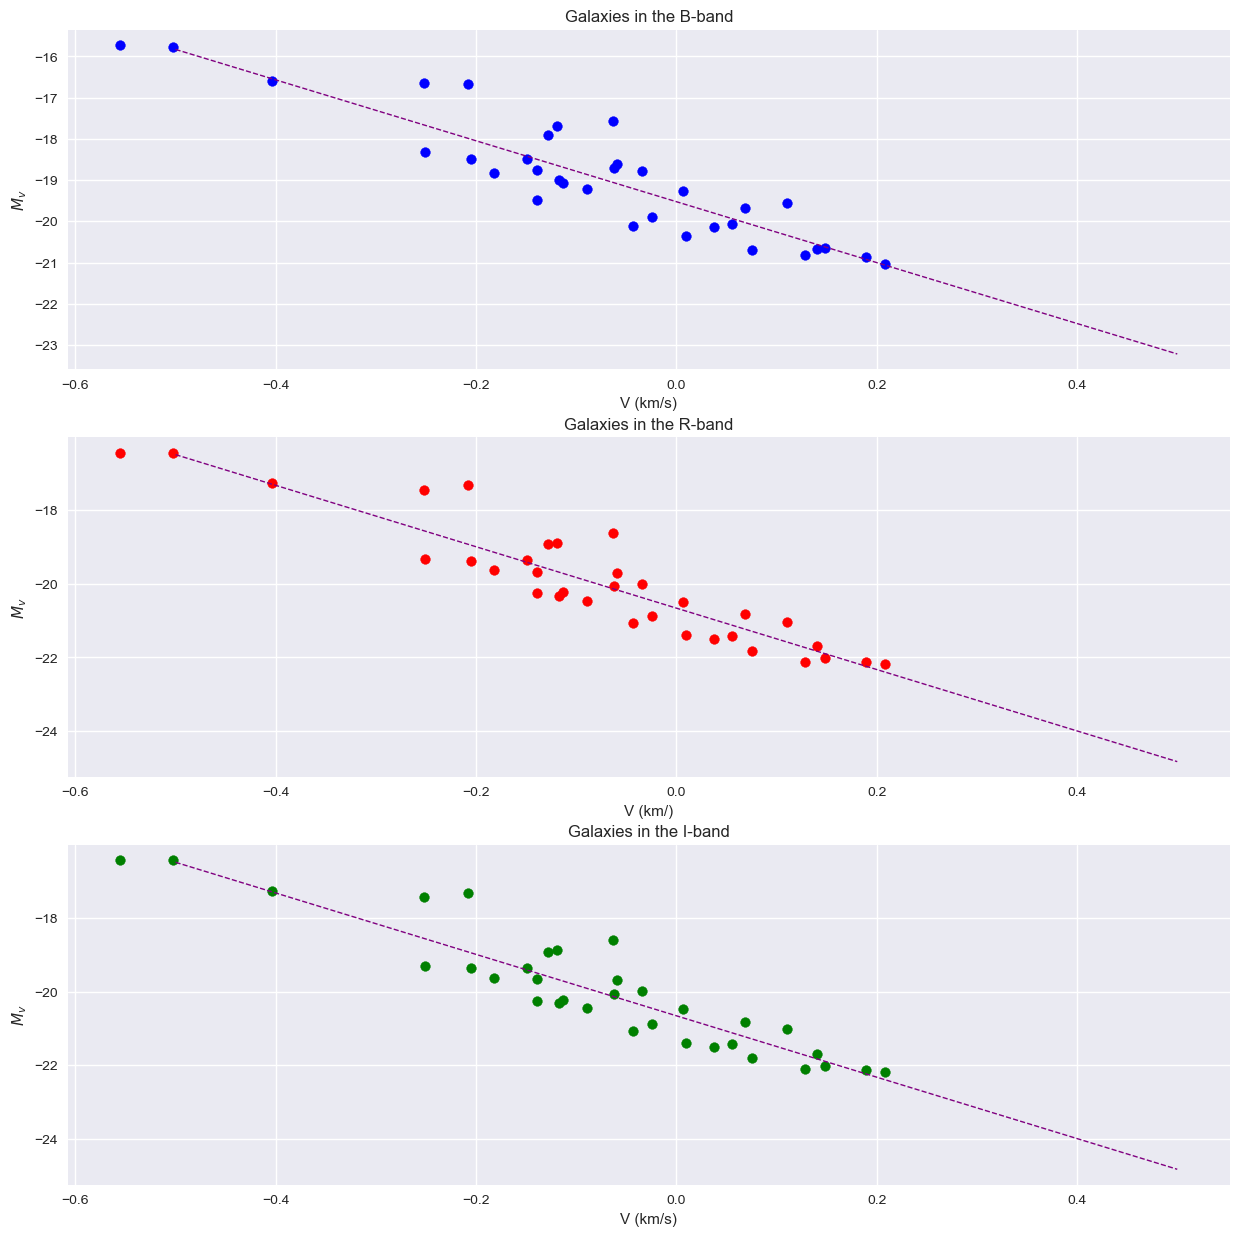

In [13]:
#create a best-fit line to data
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


# plot velocities over 200 km/s in log
log_200 = np.log10(Vc_correct/200)

x = np.linspace(-0.5,0.5,10)

a, b = np.polyfit(log_200,abs_B, 1)
plt.subplot(311)
plt.scatter(log_200, abs_B, color='b', marker="o", label='original')
plt.xlabel('V (km/s)')
plt.ylabel('$M_v$')
plt.title('Galaxies in the B-band')
plt.plot(x, a*x+b, color='purple', linestyle='--', linewidth=1)


f, u = np.polyfit(log_200,abs_R, 1)
plt.subplot(312)
plt.scatter(log_200, abs_R, color='r', marker="o", label='original')
plt.xlabel('V (km/)')
plt.ylabel('$M_v$')
plt.title('Galaxies in the R-band')
plt.plot(x, f*x+u, color='purple', linestyle='--', linewidth=1)



k, l = np.polyfit(log_200,abs_I, 1)
plt.subplot(313)
plt.scatter(log_200, abs_I, color='g', marker="o", label='original')
plt.xlabel('V (km/s)')
plt.ylabel('$M_v$')
plt.title('Galaxies in the I-band')
plt.plot(x, k*x+l, color='purple', linestyle='--', linewidth=1)

plt.show()

In [14]:
#calculate uncertantity in B,R,I filetrs for absolute magnitudes
print(np.std(abs_B))
print(np.std(abs_R))
print(np.std(abs_I))
#print slopes and intercept of the B,R,I filters

print(a,b) #slope and intercept of B-filter
print(f,u) #slope and intercept of R-filter
print(k,l) #slope and intercept of I-filter

1.4450275077900407
1.6016718125620208
1.6016718125620208
-7.3882096077845825 -19.524070582163763
-8.346235318116552 -20.659678151945165
-8.346235318116552 -20.659678151945165


Creating a best-fit line to the absolute magnitudes of the galaxies in our star cluster helps us to maximize our approximation. Given the slopes and intercepts of the filters above there is not much slight variation in the values of $a_x$ and $\beta_x$. The uncertainty in the B, R, I are ~ 1, which is an indicator of close proximity of each of these galaxies.The difference in $\beta_x$ is only attributed to the different absolute magnitudes of the B, R, and I filters. 

# Part E

We observe a galaxy that is out side of the Virgo cluster using the the same relationship involving our absolute and magnitudes from earlier. Since, we know the galaxy is near the Virgo cluster, we can use basic assumptions to determine the distance. First, the absolute magnitude I calculated was -19, which is along the lines of some galaxies in the cluster. If the absolute magnitude is this bright for this spiral galaxy, then the distance should be similar to that of a galaxy in the Virgo cluster. Recall the distance to NGC 4321 is ~$1.54646791×10^7$ Mpc, which we can compare to our distance found for this spiral galaxy. I determined the distance to be ~ $2.8127362×10^7$ Mpc. It appears the galaxy is indeed close by given it's similary close proximity. We could have determined different variations in distance, however, since I used the slope and intercept from our B-filter to compute the absolute magnitude, we found a value that was reasonable.

In [15]:
app_s= 13.5 # spiral apparent magnitude
s_obs=180 #velocity in km/s 
s_inc=np.sin(np.radians(65)) #spiral inclination
s_correct=(s_obs/s_inc) # corrected velocity 

#calculate the absolute magnitude using the slope and intercept from B-filter
abs_s = a*np.log(s_obs/200)+b

#calculate the distance
s_a=(abs_s/5)
s_b=(app_s/5)
distance = 10**(s_b-s_a+1)
print(f"The spiral galaxy distance is ~",(round(distance)), "Mpc")

The spiral galaxy distance is ~ 28127362 Mpc
